In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('Downloads/marketing_campaign.csv', sep='\t')

print("First 5 rows")
print(df.head())

print("\nDataset Info:")
print(df.info())
#DATA CLEANING SECTION
print("\nMissing values in each column:")
print(df.isnull().sum())

First 5 rows of the dataset:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2

In [10]:
median_income = df['Income'].median()
print(f"Median Income: {median_income}")

df['Income'].fillna(median_income, inplace=True)

print("\nMissing values after imputation:")
print(df.isnull().sum())

Median Income: 51381.5

Missing values after imputation:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [11]:
#Encoding Section
encoded_df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

print("\nColumns after encoding categorical variables:")
print(encoded_df.columns)


Columns after encoding categorical variables:
Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO'],
      dtype='object')


In [12]:
numerical_columns = [
    'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
    'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
    'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue'
]

scaler = StandardScaler()
encoded_df[numerical_columns] = scaler.fit_transform(encoded_df[numerical_columns])

print("\nFirst 5 rows after scaling:")
print(encoded_df[numerical_columns].head())


First 5 rows after scaling numerical features:
   Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0   -0.985345  0.235696 -0.825218 -0.929894  0.307039  0.983781   1.551577   
1   -1.235733 -0.235454  1.032559  0.906934 -0.383664 -0.870479  -0.636301   
2   -0.317643  0.773999 -0.825218 -0.929894 -0.798086  0.362723   0.570804   
3    1.268149 -1.022355  1.032559 -0.929894 -0.798086 -0.870479  -0.560857   
4    1.017761  0.241888  1.032559 -0.929894  1.550305 -0.389085   0.419916   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0         1.679702         2.462147          1.476500      0.843207   
1        -0.713225        -0.650449         -0.631503     -0.729006   
2        -0.177032         1.345274         -0.146905     -0.038766   
3        -0.651187        -0.503974         -0.583043     -0.748179   
4        -0.216914         0.155164         -0.001525     -0.556446   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchas

C:\Users\MHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\MHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less ch

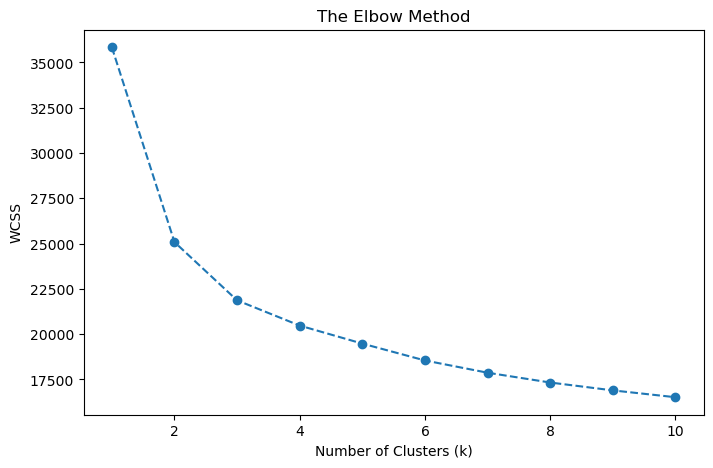

In [13]:
wcss = []  
k_values = range(1, 11) 

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(encoded_df[numerical_columns])
    wcss.append(kmeans.inertia_)  

plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=3, random_state=42)
encoded_df['Cluster'] = kmeans.fit_predict(encoded_df[numerical_columns])

print("First 5 rows of the dataset with cluster labels:")
print(encoded_df[['ID', 'Cluster']].head())

print("\nCluster Centers:")
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=numerical_columns)
print(cluster_centers)

First 5 rows of the dataset with cluster labels:
     ID  Cluster
0  5524        0
1  2174        1
2  4141        0
3  6182        1
4  5324        1

Cluster Centers:
   Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0   -0.032620  0.970116 -0.743071 -0.620632  0.013725  0.840191   1.085355   
1    0.245609 -0.694047  0.672230 -0.126058  0.009518 -0.782305  -0.537302   
2   -0.371907  0.226300 -0.403805  0.789565 -0.028493  0.492992  -0.138844   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0         1.267346         1.140601          1.076871      0.633213   
1        -0.638212        -0.560615         -0.536119     -0.555175   
2        -0.144399        -0.152527         -0.132816      0.315144   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0          -0.520379         0.404724             1.129954           0.804953   
1          -0.139983        -0.716068            -0.725468          -0.

C:\Users\MHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


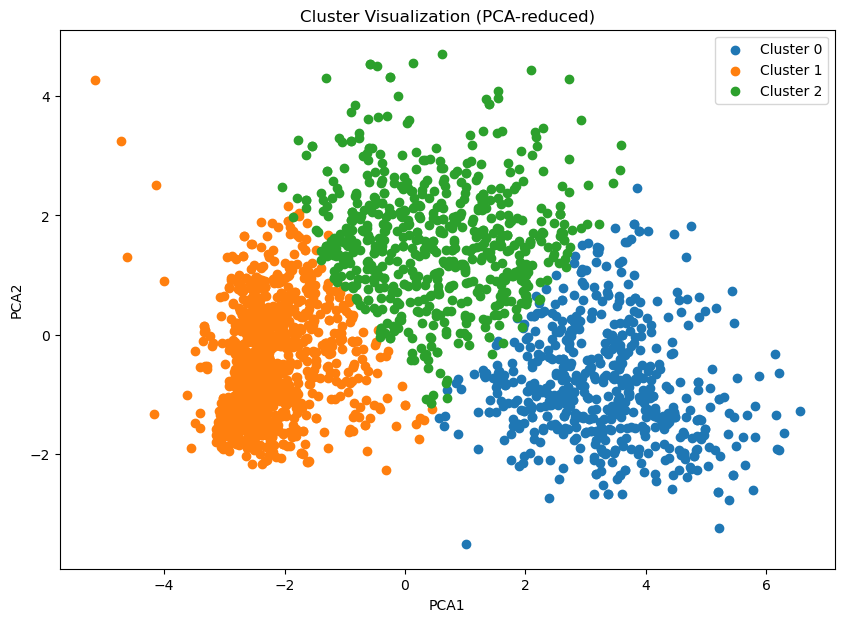

In [15]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(encoded_df[numerical_columns])

encoded_df['PCA1'] = pca_result[:, 0]
encoded_df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 7))
for cluster in encoded_df['Cluster'].unique():
    cluster_data = encoded_df[encoded_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

plt.title('Cluster Visualization (PCA-reduced)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

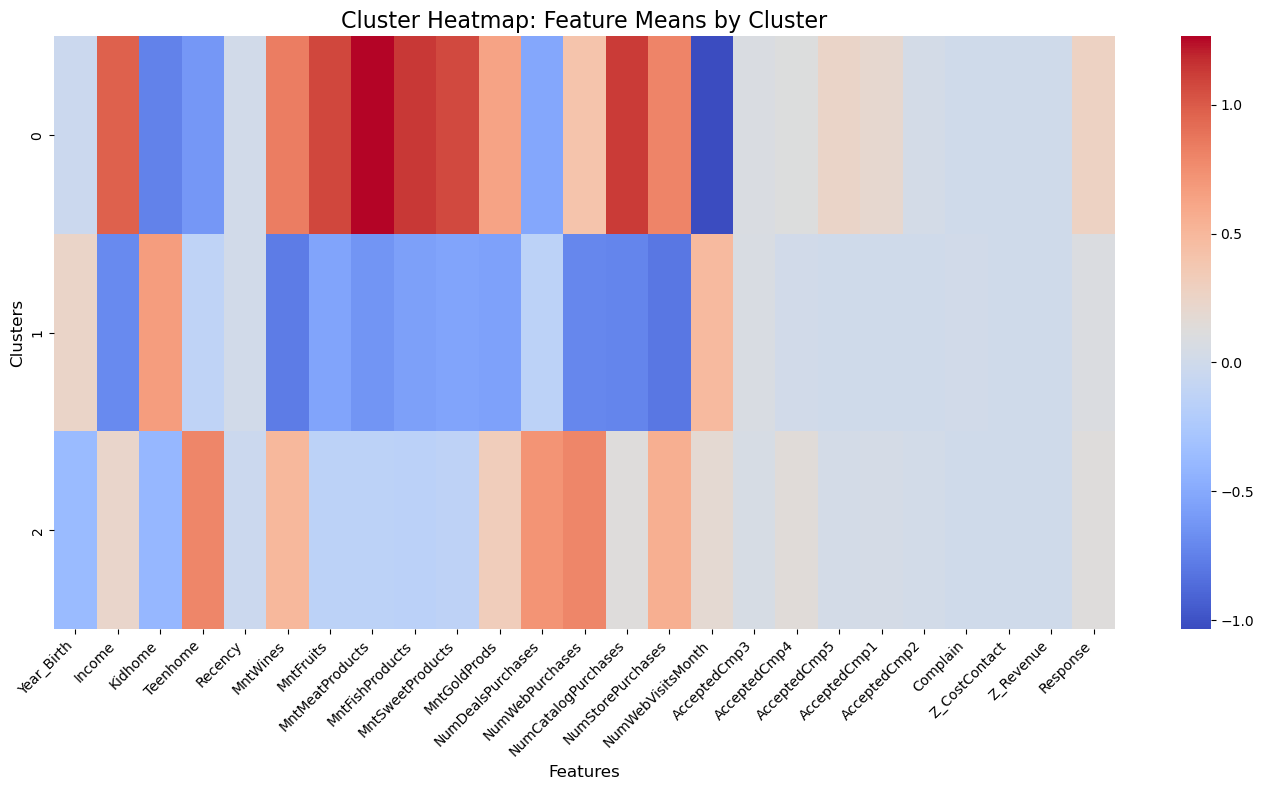

In [18]:
relevant_columns = [
    col for col in numeric_columns if col not in ['ID', 'PCA1', 'PCA2']
]

cluster_summary = encoded_df.groupby('Cluster')[relevant_columns].mean()

plt.figure(figsize=(14, 8))
sns.heatmap(cluster_summary, cmap='coolwarm', annot=False, cbar=True)
plt.title('Cluster Heatmap: Feature Means by Cluster', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Clusters', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
numeric_columns = encoded_df.select_dtypes(include=['number']).columns

cluster_summary = encoded_df[numeric_columns].groupby(encoded_df['Cluster']).mean()

pd.set_option('display.max_columns', None)  
print("Cluster Feature Summary:")
print(cluster_summary)

cluster_summary.to_csv("Downloads/cluster_summary.csv")

Cluster Feature Summary:
                  ID  Year_Birth    Income   Kidhome  Teenhome   Recency  \
Cluster                                                                    
0        5649.186757   -0.035088  0.968956 -0.743211 -0.621158  0.014106   
1        5626.043860    0.245609 -0.694047  0.672230 -0.126058  0.009518   
2        5482.793600   -0.370124  0.226204 -0.403131  0.792316 -0.028919   

         MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                          
0        0.837685   1.085250         1.265179         1.138431   
1       -0.782305  -0.537302        -0.638212        -0.560615   
2        0.494798  -0.140704        -0.144616        -0.152551   

         MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
Cluster                                                                       
0                1.075699      0.631063          -0.520660         0.403985   
1               -0.536119 

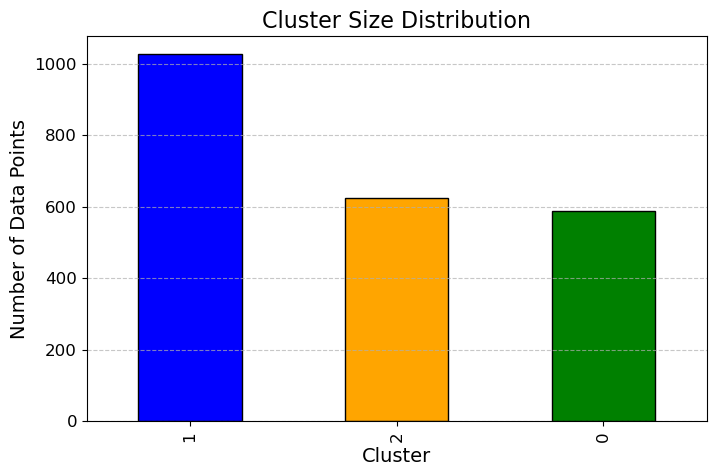

In [22]:
cluster_sizes = encoded_df['Cluster'].value_counts()

plt.figure(figsize=(8, 5))
cluster_sizes.plot(kind='bar', color=['blue', 'orange', 'green'], edgecolor='black')
plt.title('Cluster Size Distribution', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Number of Data Points', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

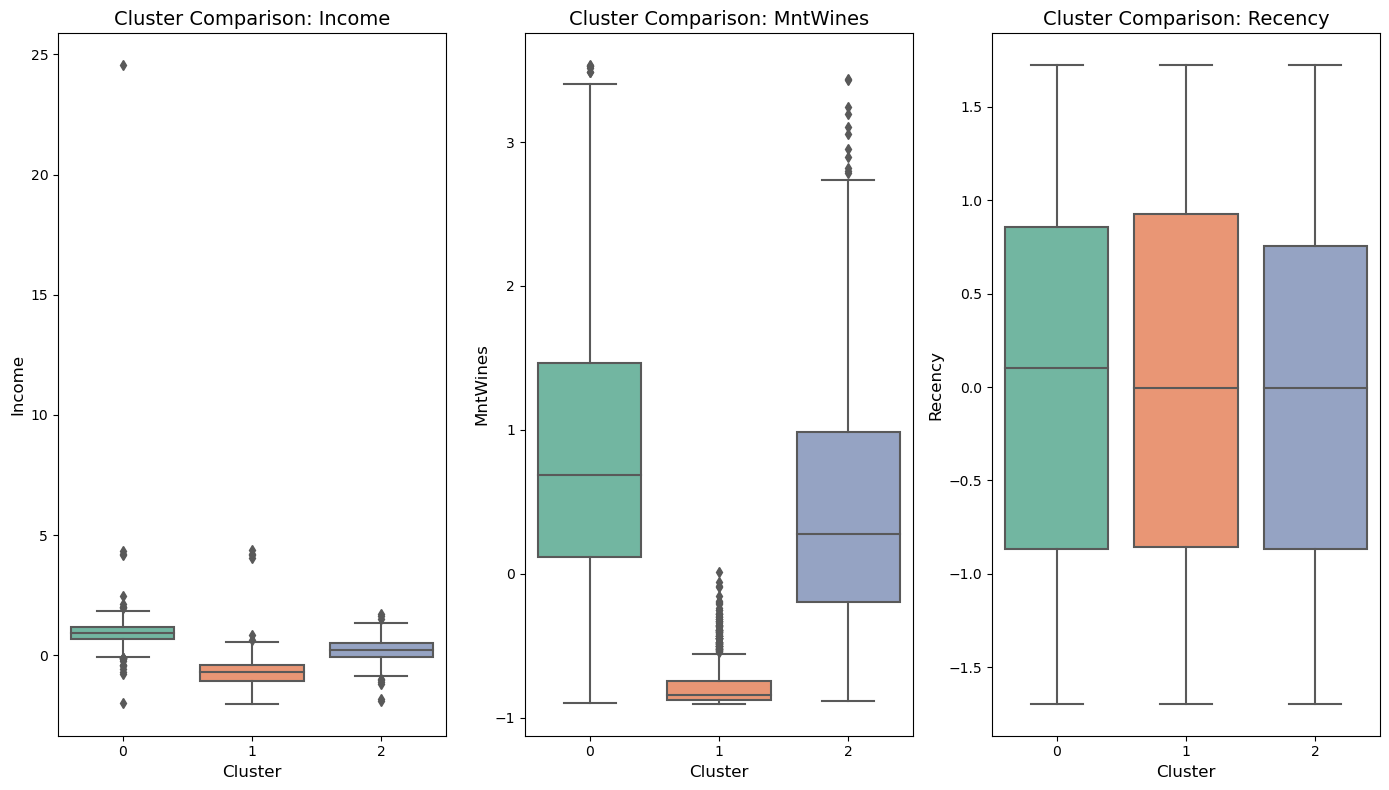

In [23]:
selected_features = ['Income', 'MntWines', 'Recency']

plt.figure(figsize=(14, 8))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(1, len(selected_features), i)
    sns.boxplot(data=encoded_df, x='Cluster', y=feature, palette='Set2')
    plt.title(f'Cluster Comparison: {feature}', fontsize=14)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

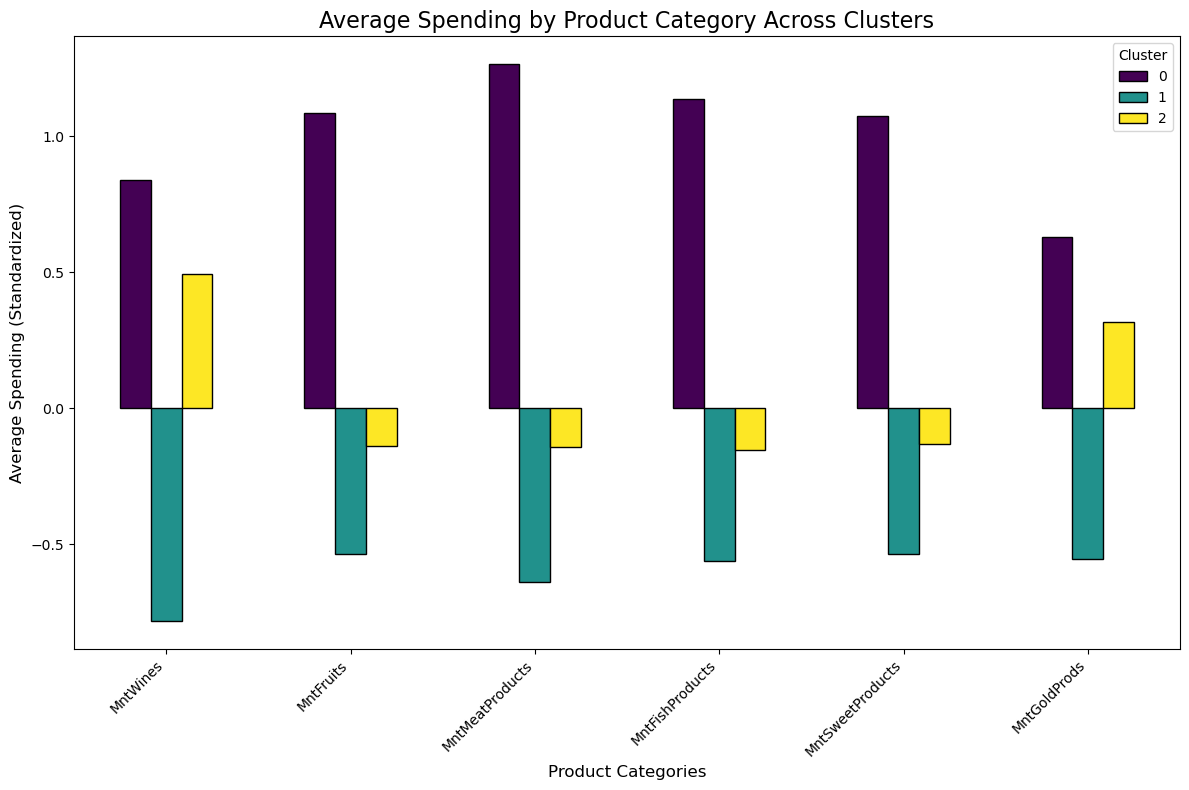

In [24]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

average_spending = encoded_df.groupby('Cluster')[spending_columns].mean()

plt.figure(figsize=(12, 8))
average_spending.T.plot(kind='bar', figsize=(12, 8), cmap='viridis', edgecolor='black')

plt.title("Average Spending by Product Category Across Clusters", fontsize=16)
plt.xlabel("Product Categories", fontsize=12)
plt.ylabel("Average Spending (Standardized)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Cluster", fontsize=10)
plt.tight_layout()
plt.show()

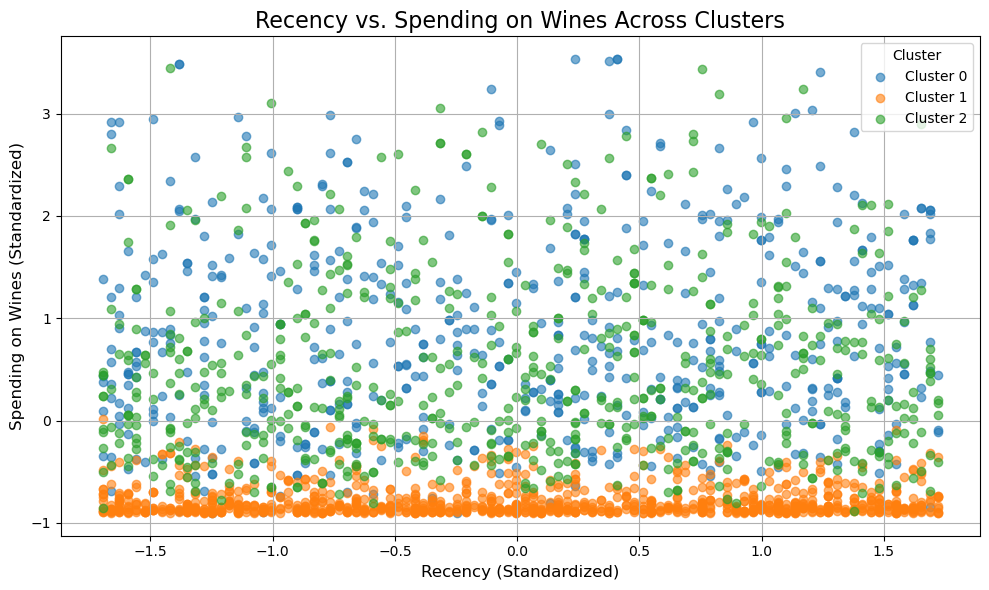

In [25]:
plt.figure(figsize=(10, 6))

for cluster in encoded_df['Cluster'].unique():
    cluster_data = encoded_df[encoded_df['Cluster'] == cluster]
    plt.scatter(cluster_data['Recency'], cluster_data['MntWines'], label=f'Cluster {cluster}', alpha=0.6)

plt.title('Recency vs. Spending on Wines Across Clusters', fontsize=16)
plt.xlabel('Recency (Standardized)', fontsize=12)
plt.ylabel('Spending on Wines (Standardized)', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()